Week-4: Building a CNN for Image Classification
- Design and implement a CNN model (with 4+ layers of convolutions) to classify multi category
image datasets.
- Use the Fashion MNIST dataset.
- Set the number of Epoch as 5, 10 and 20.
- Make the necessary changes whenever required. Record the accuracy corresponding to the number
of epochs.
- Record the time required to run the program, using CPU as well as using GPU in Colab.

Fashion MNIST Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
import keras

from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7533 - loss: 0.6720 - val_accuracy: 0.8742 - val_loss: 0.3393
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9001 - loss: 0.2726 - val_accuracy: 0.9023 - val_loss: 0.2608
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9195 - loss: 0.2146 - val_accuracy: 0.9157 - val_loss: 0.2349
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9346 - loss: 0.1787 - val_accuracy: 0.9172 - val_loss: 0.2233
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9437 - loss: 0.1480 - val_accuracy: 0.9187 - val_loss: 0.2300
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9091 - loss: 0.2532
Test loss: 0.24371562898159027
Test accuracy: 0.9126999974250793
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label for first test image: 9


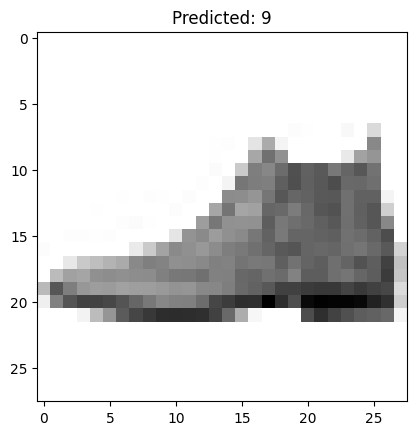

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Build model with padding='same'
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# No more MaxPooling here

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Prediction example
predictions = model.predict(test_X)
print('Predicted label for first test image:', np.argmax(predictions[0]))

# Show first test image with prediction
plt.imshow(test_X[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted: {np.argmax(predictions[0])}')
plt.show()


In [ ]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9521 - loss: 0.1274 - val_accuracy: 0.9220 - val_loss: 0.2401
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9594 - loss: 0.1115 - val_accuracy: 0.9113 - val_loss: 0.2618
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9665 - loss: 0.0874 - val_accuracy: 0.9232 - val_loss: 0.2407
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9729 - loss: 0.0738 - val_accuracy: 0.9238 - val_loss: 0.2873
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9770 - loss: 0.0633 - val_accuracy: 0.9258 - val_loss: 0.3017
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9789 - loss: 0.0540 - val_accuracy: 0.9215 - val_loss: 0.3004
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9834 - loss: 0.0448 - val_accuracy: 0.9210 - val_loss: 0.2990
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9868 - loss: 0.0357 - val_accuracy:

In [ ]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.9197 - val_loss: 0.3981
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9902 - loss: 0.0282 - val_accuracy: 0.9152 - val_loss: 0.4708
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9894 - loss: 0.0297 - val_accuracy: 0.9220 - val_loss: 0.4555
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9128 - val_loss: 0.4823
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9173 - val_loss: 0.4240
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9922 - loss: 0.0220 - val_accuracy: 0.9213 - val_loss: 0.4634
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9222 - val_loss: 0.4647
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy

In [ ]:
import time
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

start_time = time.time()  # Start timer

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Model definition
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train model for 10 epochs (or change as you want)
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1, verbose=2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)

end_time = time.time()  # End timer

elapsed_time = end_time - start_time

print(f"Test accuracy: {test_acc:.4f}")
print(f"Total training + evaluation time: {elapsed_time:.2f} seconds")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 16s - 19ms/step - accuracy: 0.8369 - loss: 0.4401 - val_accuracy: 0.8882 - val_loss: 0.2955
Epoch 2/5
844/844 - 6s - 7ms/step - accuracy: 0.9021 - loss: 0.2651 - val_accuracy: 0.9088 - val_loss: 0.2506
Epoch 3/5
844/844 - 10s - 12ms/step - accuracy: 0.9187 - loss: 0.2199 - val_accuracy: 0.9192 - val_loss: 0.2275
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.9319 - loss: 0.1838 - val_accuracy: 0.9180 - val_loss: 0.2305
Epoch 5/5
844/844 - 6s - 7ms/step - accuracy: 0.9411 - loss: 0.1580 - val_accuracy: 0.9232 - val_loss: 0.2285
Test accuracy: 0.9176
Total training + evaluation time: 52.74 seconds


In [1]:
import time
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

start_time = time.time()  # Start timer

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Model definition
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train model for 10 epochs (or change as you want)
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10, validation_split=0.1, verbose=2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)

end_time = time.time()  # End timer

elapsed_time = end_time - start_time

print(f"Test accuracy: {test_acc:.4f}")
print(f"Total training + evaluation time: {elapsed_time:.2f} seconds")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 - 17s - 20ms/step - accuracy: 0.8401 - loss: 0.4339 - val_accuracy: 0.8960 - val_loss: 0.2833
Epoch 2/10
844/844 - 6s - 7ms/step - accuracy: 0.9035 - loss: 0.2636 - val_accuracy: 0.9023 - val_loss: 0.2725
Epoch 3/10
844/844 - 10s - 12ms/step - accuracy: 0.9189 - loss: 0.2188 - val_accuracy: 0.9148 - val_loss: 0.2318
Epoch 4/10
844/844 - 11s - 12ms/step - accuracy: 0.9302 - loss: 0.1861 - val_accuracy: 0.9142 - val_loss: 0.2337
Epoch 5/10
844/844 - 6s - 7ms/step - accuracy: 0.9414 - loss: 0.1566 - val_accuracy: 0.9175 - val_loss: 0.2225
Epoch 6/10
844/844 - 6s - 7ms/step - accuracy: 0.9503 - loss: 0.1348 - val_accuracy: 0.9242 - val_loss: 0.2266
Epoch 7/10
844/844 - 10s - 12ms/step - accuracy: 0.9578 - loss: 0.1131 - val_accuracy: 0.9163 - val_loss: 0.2577
Epoch 8/10
844/844 - 10s - 12ms/step - accuracy: 0.9650 - loss: 0.0939 - val_accuracy: 0.9203 - val_loss: 0.2379
Epoch 9/10
844/844 - 10s - 12ms/step - accuracy: 0.9702 - loss: 0.0799 - val_accuracy: 0.9102 - val_lo